In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
train=pd.read_csv("train.csv")
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
train.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.shape

(891, 12)

In [6]:
print(train.isna())


     PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked

In [7]:
train1=train.dropna()
print(train1)

     PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
6              7         0       1   
10            11         1       3   
11            12         1       1   
..           ...       ...     ...   
871          872         1       1   
872          873         0       1   
879          880         1       1   
887          888         1       1   
889          890         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
..                                                 ...     ...   ... 

In [8]:
train1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [9]:
train1.describe(include=object)

,Name,Sex,Ticket,Cabin,Embarked
count,183,183,183,183,183
unique,183,2,127,133,3
top,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",male,113760,G6,S
freq,1,95,4,4,116


In [10]:
corrtab=train1.corr()
print(corrtab)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000  0.148495 -0.089136  0.030933 -0.083488 -0.051454   
Survived        0.148495  1.000000 -0.034542 -0.254085  0.106346  0.023582   
Pclass         -0.089136 -0.034542  1.000000 -0.306514 -0.103592  0.047496   
Age             0.030933 -0.254085 -0.306514  1.000000 -0.156162 -0.271271   
SibSp          -0.083488  0.106346 -0.103592 -0.156162  1.000000  0.255346   
Parch          -0.051454  0.023582  0.047496 -0.271271  0.255346  1.000000   
Fare            0.029740  0.134241 -0.315235 -0.092424  0.286433  0.389740   

                 Fare  
PassengerId  0.029740  
Survived     0.134241  
Pclass      -0.315235  
Age         -0.092424  
SibSp        0.286433  
Parch        0.389740  
Fare         1.000000  


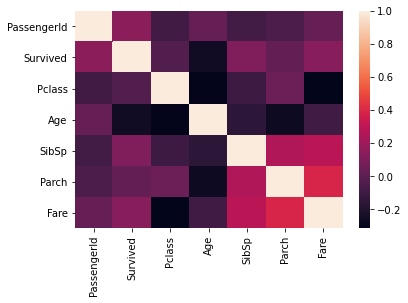

In [11]:
sb.heatmap(corrtab)
plt.show()

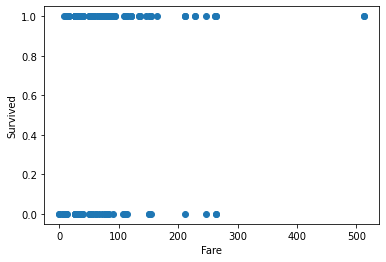

In [12]:
plt.scatter(x=train1['Fare'],y=train1['Survived'])
plt.xlabel("Fare")
plt.ylabel("Survived")
plt.show()

In [13]:
pd.crosstab(train1['Sex'],train1['Survived'])

Survived,0,1
Sex,,
female,6,82
male,54,41


In [14]:
# child=pd.DataFrame(train1['Survived'].groupby(by=[train1['Age']<=18]))
# print(child)
# adult=pd.DataFrame(train1['Survived'].groupby(by=[train1['Age']>18 and train1['Age']<=30]))
# young=pd.DataFrame(train1['Survived'].groupby(by=[train1['Age']>30 and train1['Age']<=50]))
# pd.crosstab(child,adult,young)

In [15]:
age_group=[]
for i in train1['Age']:
    if i<=18:
        age_group.append("child")
    elif i>18 and i<=30:
        age_group.append("adult")
    elif i>30 and i<=50:
        age_group.append("young")
    elif i>50:
        age_group.append("senior")
train1['age_group']=age_group
print(pd.crosstab(train1['age_group'],train1['Survived']))

Survived    0   1
age_group        
adult      13  33
child       3  20
senior     16  16
young      28  54


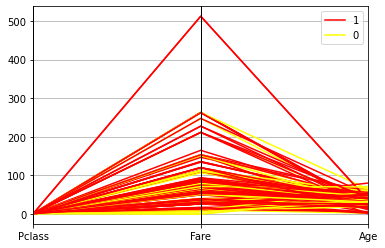

In [16]:
pd.plotting.parallel_coordinates(train1,'Survived',cols=['Pclass','Fare','Age'],color=['red','yellow','green'])
plt.show()

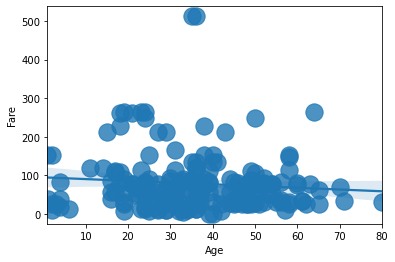

In [17]:
sb.regplot(x='Age',y='Fare',data=train1,scatter_kws={'s':300})
plt.show()

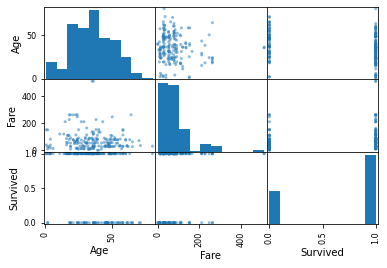

In [18]:
pd.plotting.scatter_matrix(train1[['Age','Fare','Survived']])
plt.show()

In [19]:
a=train1[train1['Sex']=='male'].shape[0]
print(a)
b=train1[train1['Sex']=='female'].shape[0]
print(b)
fm=train1[(train1['Sex']=='male')&train1['Survived']==1].shape[0]
fs=train1[(train1['Sex']=='female')&train1['Survived']==1].shape[0]
print(fm,fs)
print(a/fm)
print(b/fs)

95
88
41 82
2.317073170731707
1.0731707317073171
